<img src="./img/HWNI_logo.svg"/>

# Lab A - Unpaired t-Tests

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

In this lab, we'll look at some more commonly-used and practical hypothesis tests than the simple example used in the
[hypothesis testing lab](../03%20-%20Hypothesis%20Testing/Lab%20-%20Hypothesis%20Testing.ipynb).
In these tests, instead of collecting only one data point in our experimental condition, we'll collect multiple data points. All the tests considered in this lab -- paired and unpaired t-tests, non-parametric tests -- arise due to different choices of test statistic.

In this half of the lab, we'll be looking at using unpaired t-tests. On the programming side, we'll review some of our plotting skills and learn more about how to load datasets into pandas and how we organize those datasets.

## Dataset Introduction

Octopamine has been implicated in modulating feeding behaviors in both vertebrates and invertebrates. Pargyline has been shown to increase the levels of octopamine in the nervous system. 

We'll look at data from two experiments on octopamine and feeding behavior.

In the first, the effect of pargyline on sucrose consumption was tested in blowflies. Two groups of blowfies were used in this study: one group was injected with parglyine (n=295 flies) while the control group was injected with saline (n = 300 flies). The amount of sucrose consumed was then measured. [adapted from Samuels & Witmer, pg 220. Originally: Long & Murdock, PNAS 1983]

**Q1** Why is an unpaired test appropriate for this data set?

<font color='#1874CD'> **There is no natural way to pair the data points -- they were measured in different flies at different times.**

## Loading Data

The cell below loads the data into pandas. The functions for loading external data all begin with "read", so you can check out your options by typing in `pd.read` and then hitting `Tab`. Other options include Excel files, the clipboard, and `.json` files. You can look at the documentation for each function in the usual way, with the `?` symbol.

The most basic format for storing data is the "comma-separated values", or `.csv`, format. There's a brief discussion of this format in the course tutorial on pandas. You can also view comma-separated values files in Excel and even save some `.xls` files as `.csv` files.

In [3]:
fly_data = pd.read_csv('data/3a.csv', index_col=None)

fly_data.sample(10)

,SucrConsump,Injection,Exp_Idx
609,23.2,Saline,2
738,9.9,PargYomb,2
251,24.9,Saline,1
653,8.0,Saline,2
58,20.6,Saline,1
77,11.5,Saline,1
388,41.4,Parg,1
88,9.5,Saline,1
262,10.9,Saline,1
116,14.1,Saline,1


Following the principles of ["tidy data"](http://www.jeannicholashould.com/tidy-data-in-python.html), we've stored each of our observations in a row. An observation includes the raw data (in this case, the amount of sugar consumed), the kind of injection the fly received, and, since we'll be looking at two experiments in this lab, an identifier for the experiment during which this datapoint was measured.

## Visualizing the Data

Begin by plotting the histograms and computing means and standard deviations for both groups of flies in experiment #1. Remember: you'll need to subset your data by experiment index and by injection. Try to avoid hard-coding as much as possible, since you'll need to re-run this code with the data from experiment #2 later. For example, you'll want to use selection on the experiment index to pull out all of the data for one experiment:
```python
fly_data[fly_data.Exp_Idx == experiment_index]
```

Think about your histogram: should the bins be the same or different for the two groups? Is a rugplot helpful? Be ready to discuss your choices in class.

Group Saline:
	 Mean 14.96, SD 5.398315109371339
Group Parg:
	 Mean 46.363389830508474, SD 11.798279681205674


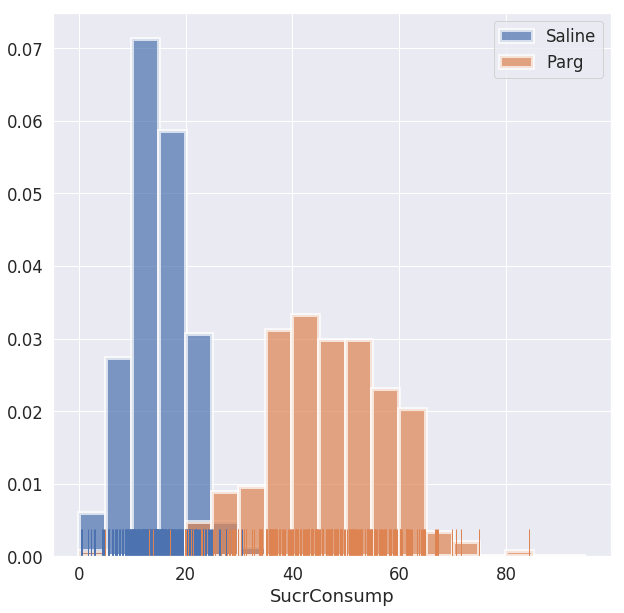

In [4]:
# answer
experiment_index = 1

experiment_data = fly_data[fly_data.Exp_Idx == experiment_index]
injections = experiment_data.Injection.unique()

for injection in injections:
    group_data = experiment_data.SucrConsump[experiment_data.Injection == injection]
    
    print("Group {}:".format(injection))
    print("\t Mean {0}, SD {1}".format(group_data.mean(),group_data.std()))
    
    sns.distplot(group_data, kde=False, rug=True, label=injection,
                 bins=range(0,100,5),
                    hist_kws={'alpha':0.7,
                              'edgecolor':'white',
                              'linewidth':4,
                              'density':True}).legend()

**Q2** Based off of this visualization and these statistics, do you expect the difference of the means to be statistically significant (at the traditional/obligatory $\alpha = 0.05$)? Why or why not?

<font color='#1874CD'>  
**For the first experiment, the distributions have very little overlap and their means are several standard deviations apart, so I expect a significant finding.**

**For the second experiment, the distributions have substantial overlap and their means are closer together, relative to the standard deviation, so I do not expect a significant finding.**

Now, visualize the data as a barplot with 95% confidence interval error bars.

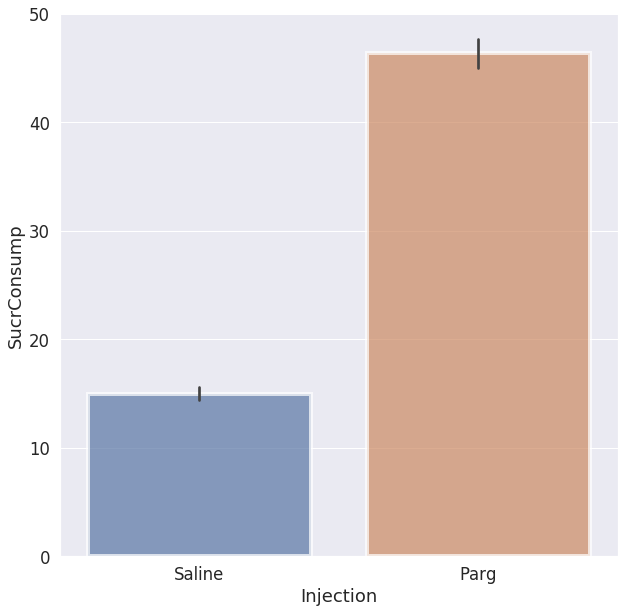

In [5]:
sns.barplot(data=experiment_data, x="Injection", y="SucrConsump", ci=95,
            alpha=0.7, edgecolor='white', linewidth=4,);

**Q3** Based off of the barplot, what do you expect the result of your t-test to be?

<font color='#1874CD'>  

**In the first experiment, the 95% CI bars are very far from each other, so we expect an extremely high t-statistic and thus low p-value.**

**In the second experiment, the 95% CI bars overlap substantially, so we expect a low t-statistic.**

Now, plot the data as a boxplot.

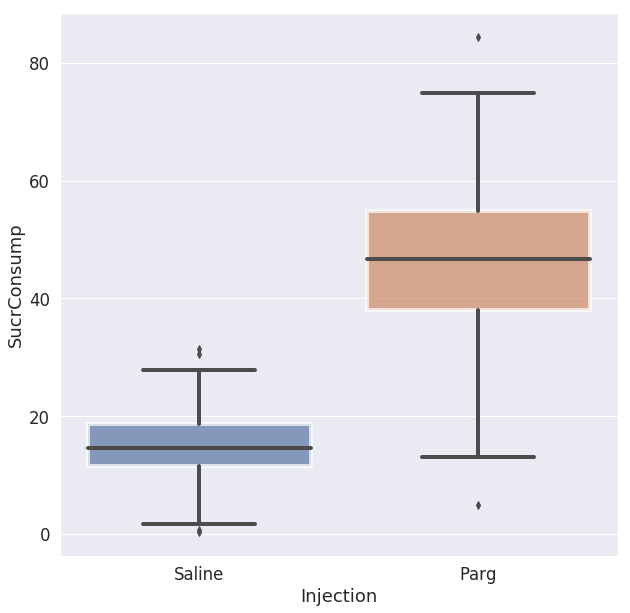

In [6]:
sns.boxplot(data=experiment_data, x="Injection", y="SucrConsump",
           linewidth=4,
            boxprops={'edgecolor':'white','alpha':0.7});

**Q4** The boxplot can be used to see whether the assumptions for a $t$-test are met. What pieces of information would you use and what would they tell you?

<font color='#1874CD'>

**We can see whether the distributions are symmetric, and so possibly Gaussian, or close to it.
We can also see whether the variances are equal between the two groups.**

## Running the Test

Now, we can use the `scipy` package to run a $t$-test to determine if the difference between the groups is statistically significant. The function `scipy.stats.ttest_ind` 
([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
will run a $t$-test for you.

Template:
```python
scipy.stats.ttest_ind(sample_1, sample_2, equal_var=False)
```

**Q5** What are your results?

<font color='#1874CD'>

**The results are as expected for both experiments.**

In [7]:
groups = [experiment_data.SucrConsump[experiment_data.Injection == injection] 
              for injection in injections]

scipy.stats.ttest_ind(groups[0], groups[1],
                      equal_var=False).pvalue

2.093843051460494e-149

**Q6** One of the keyword arguments for `ttest_ind` is `equal_var`. This lets us switch from a version of the t-test that assumes both groups have the same variance to one that does not assume this. Which version is more appropriate in this case?

<font color='#1874CD'>

**Since we have no reason to assume that the variances are the same, we should use the unequal-variances version of the test.**

**Warning: checking the variances and then using the result to decide which $t$-test to run is actually a form of double-dipping that can increase your false positive rate above $\alpha$!**

In a follow-up experiment to further confirm octopamine positively modulates feeding behavior, an additional experiment was done with yohimbine (an antagonist of octopamine receptors in insects). One group was injected with parglyine and yohimbine (n = 130) while an additional control group was injected with saline (n = 100). The amount of sucrose consumed was then measured.

Repeat all of the above exercises for this experiment. There's no need to write all of your code again in new cells. If you wrote your code with good style, it should all be reusable -- just change which experiment number is used to subset the data all the way up at the top. You also don't need to add new cells for your written answers: simply include responses for both experiments in the cells above.

## Running Multiple 2-Sample Tests

Many, if not most,
experiments have more than two groups in them:
we might want to compare sucrose consumption
in flies exposed to pargyline and five other compounds,
or in different genotypes of flies exposed to pargyline.

One first guess at how to extend our $t$-test to experiments like this might be:
take each pair of samples and compare them to each other using the $t$-test.
The section below will work with simulated data to demonstrate that this approach is a bad idea.
In the next section, on ANOVA,
we will develop a better solution.

In [8]:
from itertools import combinations

In [9]:
def simulate_data(N=100, num_groups = 2):
    num_rows = N*num_groups
    measurements = np.random.standard_normal(size=(num_rows))
    group_ids = np.repeat(np.arange(1, num_groups+1), N)
    
    columns = [measurements, group_ids]
    column_labels = ["measurement", "group_id"]
    
    data_df = pd.DataFrame.from_dict({column_label: column for column_label, column
                                      in zip(column_labels, columns)})
    return data_df

def multi_ttest(dataframe):
    group_ids = dataframe.group_id.unique()
    group_combinations = combinations(group_ids, 2)
    
    p_values = [single_ttest(dataframe, group_combination)
                for group_combination in group_combinations]        
    
    return p_values

def single_ttest(dataframe, indices_to_test):
    groups = [dataframe.measurement[dataframe.group_id == index_to_test]
                 for index_to_test in indices_to_test]
    
    result = scipy.stats.ttest_ind(*groups)
    
    return result.pvalue

The function `utils.simulate_data` will generate data distributed
according to the null hypothesis of the $t$-test:
the data from each group is randomly generated according to a Gaussian distribution
with the same mean and variance.
The number of members in each group is determined by the argument `N`
and the number of groups is determined by the argument `num_groups`.

The data is returned as a `DataFrame`,
with two columns.
One, `measurement`, holds the value measured for each subject,
and the other, `group_id`, holds the group index for each subject.

For our hypothetical fly experiment,
`num_groups` is the number of compounds we expose flies to,
`N` is the number of flies we test per compound,
`group_id` is the identifier for each compound,
and `measurement` is the sucrose consumption.

In [10]:
simulated_data = simulate_data(N=1000, num_groups=5)
simulated_data.sample(5)

,measurement,group_id
1419,-1.213893,2
1844,-1.121309,2
3123,0.071813,4
2778,-0.059082,3
4759,-0.125157,5


The function `utils.multi_ttest` will apply a $t$-test
to each possible pair of groups and return the $p$-value of each test in a list.

In [11]:
test_results = multi_ttest(simulated_data)

In the cell below, use the `len` (as in `len`gth) function to calculate the number of tests that were performed.

Template:
```python
len(?)
```

In [12]:
# answer
len(test_results)

10

To determine the fraction of false positives,
we need to calculate the fraction of tests that have $p$ less than some critical value.

Calculate this value. You might use either a `for` loop or the function `np.less`, which takes in an array and returns a `1` for each element of the array

Template:
```python
np.mean(np.less(?,?))
```

In [13]:
# answer
np.mean(np.less(test_results, 0.05))

0.0

To determine the false positive rate,
we would need to run the experiment many times and calculate an average.

#### Q6 Run the experiment multiple times, taking note of the fraction of false positives. Increase `num_groups` to `20` and run the experiment multiple times again. Describe the behavior of the fraction of false positives.

<font color='#1874CD'> **With `num_groups=5`,
the fraction of false positives is very variable,
fluctuating between `0` and `0.4`.
With `num_groups=20`,
the fraction of false positives is more stable,
varying between `0.01` and `0.1`.**

In addition to the false positive rate,
which tells us the chance that,
if the null hypothesis is true for a given group,
we incorrectly reject the null hypothesis for that group,
we might be interested in the chance that we incorrectly
reject the overall null hypothesis,
which says that all of the group means are the same.
This is known as the *familywise error rate*.

In the cell below, write code that will determine whether there has been a familywise error.
You might use either an `if` statement or the function `np.any`.

Template:
```python
np.any(?)
```

In [14]:
np.any(np.less(test_results, 0.05))

False

#### Q7 Run the experiment multiple times with `num_groups=5` and `num_groups=20` and describe you observe regarding familywise errors.

<font color='#1874CD'> **With `num_groups=5`, there are sometimes familywise errors and sometimes not.
With `num_groups=20`,
there is almost always a familywise error.**

#### Q8 Predict what will happen to the behavior of the familywise error and the fraction of false positives if you increase `N`. Test your prediction and describe the results in the cell below.

<font color='#1874CD'> **Though one might expect that our problems would go away with increasing `N`, this is not the case. When we increase `N`, we also reduce the threshold value for our test statistic so that the chance of falsely rejecting the null stays at $0.05$. This does nothing to prevent familywise errors.**

#### Q9 Why does the behavior of the familywise error rate mean the multiple $t$-test approach is a bad choice for testing hypotheses about experiments with more than two samples?

<font color='#1874CD'> **The familywise error rate quickly goes to $1$ as we increase the number of $t$-tests we perform. Therefore, if we use the multiple $t$-test approach, the chance we reject the overall null hypothesis incorrectly when it is true is going to $1$, making it impossible to confidently state that the results of any individual $t$-test are not due to chance.**